# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Farhan Rahmansyah
- **Email:** rahmansyahfr22@gmail.com
- **ID Dicoding:** 	MC006D5Y1341

## Menentukan Pertanyaan Bisnis

- Bagaimana efektivitas sistem berbagi sepeda dalam mengurangi penggunaan kendaraan pribadi di kota?
- Bagaimana korelasi antara jumlah pengguna kasual dan kondisi cuaca dibandingkan dengan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Data Wrangling

### Gathering Data

In [110]:
df_day = pd.read_csv('day.csv')

In [111]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

**1. Mengecek tipe data df_day**

In [112]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat 1 tipe data yang tidak sesuai dengan kolomnya yaitu dteday -> datetime

**2. Mengecek apakah ada data duplikasi dan mengecek kenilaian statistik**

In [113]:
print('Number of duplications: ', df_day.duplicated().sum())
df_day.describe()

Number of duplications:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak terdapat keanehan pada nilai statistik dan tidak terdapat duplikasi data

**3. Mengecek apakah terdapat missing values**

In [114]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


tidak terdapat missing values pada data

### Cleaning Data

**1. Rename kolom agar mudah dipahami**

In [115]:
df_day.rename(columns={
    'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather_cond',
    "cnt": "total_rentals", "casual": "casual_users", "registered": "registered_users",
    "temp": "temperature", "atemp": "feeling_temp", "hum": "humidity", "windspeed": "wind_speed"
}, inplace=True)

**2. Ubah kolom kategorikal menjadi label**

In [116]:
df_day['month'] = df_day['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
df_day['season'] = df_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
df_day['weekday'] = df_day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
df_day['weather_cond'] = df_day['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [117]:
df_day.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temperature,feeling_temp,humidity,wind_speed,casual_users,registered_users,total_rentals
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


fitur month, season, weekday, dan weather_cond berubah menjadi label

**3. Merubah tipe data dateday menjadi datetime**

In [118]:
df_day["dateday"] = pd.to_datetime(df_day["dateday"])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   dateday           731 non-null    datetime64[ns]
 2   season            731 non-null    object        
 3   year              731 non-null    int64         
 4   month             731 non-null    object        
 5   holiday           731 non-null    int64         
 6   weekday           731 non-null    object        
 7   workingday        731 non-null    int64         
 8   weather_cond      731 non-null    object        
 9   temperature       731 non-null    float64       
 10  feeling_temp      731 non-null    float64       
 11  humidity          731 non-null    float64       
 12  wind_speed        731 non-null    float64       
 13  casual_users      731 non-null    int64         
 14  registered_users  731 non-

pada informasi data fitur dateday berubah dari tipe data object menjadi datetime

**4. Denormalize temprature, humidity, dan wind_speed**

In [119]:
df_day["temperature"] = df_day["temperature"] * 41
df_day["feeling_temp"] = df_day["feeling_temp"] * 50
df_day["humidity"] = df_day["humidity"] * 100
df_day["wind_speed"] = df_day["wind_speed"] * 67

df_day.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temperature,feeling_temp,humidity,wind_speed,casual_users,registered_users,total_rentals
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


fitur temperature, feeling_temp, humidity dan wind_speed di normalisasi menjadi nilai yang dapat ditoleran

**5. Menangani outlier pada fitur yang akan dipakai**

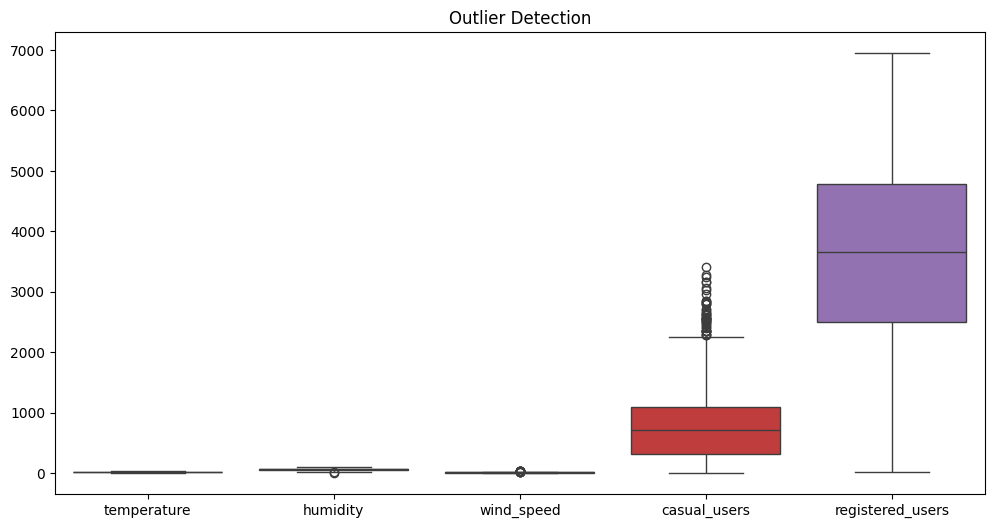

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_day[["temperature", "humidity", "wind_speed", "casual_users", "registered_users"]])
plt.title("Outlier Detection")
plt.show()

Terdapat outlier pada fitur casual_user yang menandakan bahwa banyak terdapat nilai yang tidak masuk akal

In [121]:
columns_to_check = ["temperature", "humidity", "wind_speed", "casual_users", "registered_users"]
for col in columns_to_check:
    Q1 = df_day[col].quantile(0.25)
    Q3 = df_day[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_day = df_day[(df_day[col] >= lower_bound) & (df_day[col] <= upper_bound)]

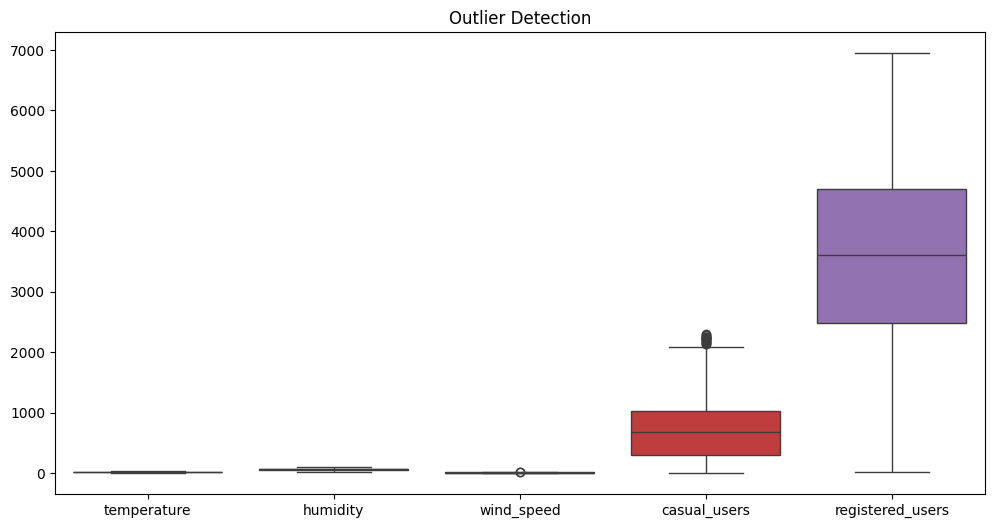

In [122]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_day[["temperature", "humidity", "wind_speed", "casual_users", "registered_users"]])
plt.title("Outlier Detection")
plt.show()

Outlier sudah diminimalisir tetapi data memiliki distribusi yang tidak normal

In [123]:
df_day.reset_index(drop=True, inplace=True)

In [124]:
df_day.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temperature,feeling_temp,humidity,wind_speed,casual_users,registered_users,total_rentals
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Insight:**
- data siap dipakai untuk proses EDA dimana dateday, season, month dan weekday menjadi acuan untuk explore data

## Exploratory Data Analysis (EDA)

### Explore ...

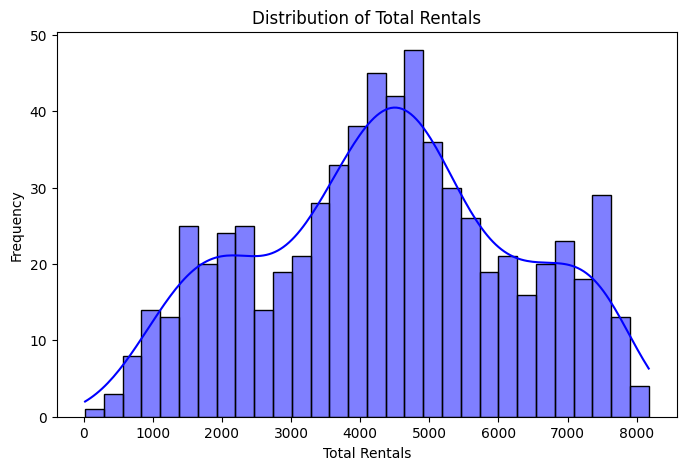

In [125]:
plt.figure(figsize=(8, 5))
sns.histplot(df_day["total_rentals"], bins=30, kde=True, color="blue")
plt.title("Distribution of Total Rentals")
plt.xlabel("Total Rentals")
plt.ylabel("Frequency")
plt.show()

Distribusi total penyewaan sepeda dalam dataset menunjukkan pola yang mendekati distribusi normal dengan sedikit kemiringan ke kanan. Sebagian besar penyewaan berkisar antara 4000 hingga 6000 sepeda per hari, yang mengindikasikan bahwa permintaan cukup stabil dalam rentang tersebut. Namun, terdapat beberapa hari dengan jumlah penyewaan yang sangat tinggi, yang dapat disebabkan oleh faktor seperti cuaca, musim, atau hari libur. Rentang total penyewaan berkisar dari 0 hingga lebih dari 8000, dengan beberapa outlier di sisi kanan yang menunjukkan lonjakan signifikan dalam permintaan. Pola ini mengindikasikan bahwa meskipun penyewaan harian umumnya konsisten, ada hari-hari tertentu dengan lonjakan yang lebih tinggi, yang bisa menjadi peluang untuk analisis lebih lanjut terkait faktor-faktor yang memengaruhinya.

<ipython-input-126-eeb85137616c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weather_cond", y="total_rentals", data=df_day, palette="Set2")


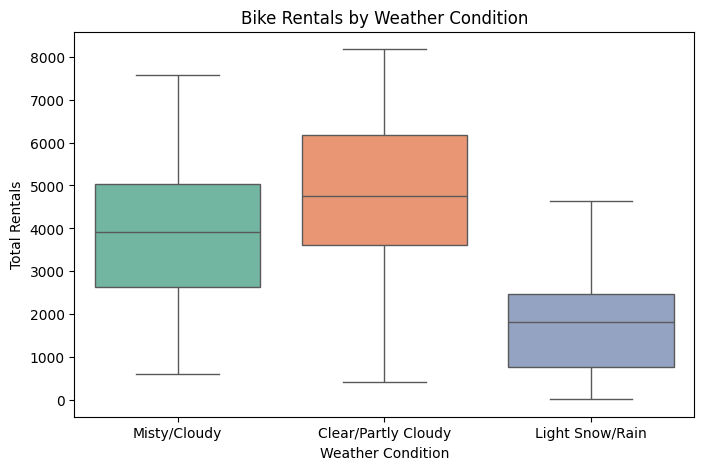

In [126]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="weather_cond", y="total_rentals", data=df_day, palette="Set2")
plt.title("Bike Rentals by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Total Rentals")
plt.show()

Dari visualisasi boxplot ini, dapat disimpulkan bahwa kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Penyewaan tertinggi terjadi pada cuaca cerah atau berawan sebagian, dengan median sekitar 5000 sepeda per hari dan variasi yang cukup besar. Sementara itu, pada kondisi berawan atau berkabut, jumlah penyewaan sedikit lebih rendah dengan median sekitar 4000 sepeda per hari, tetapi masih cukup tinggi. Sebaliknya, saat terjadi hujan ringan atau salju, jumlah penyewaan sepeda menurun drastis dengan median sekitar 2000 sepeda per hari dan rentang interkuartil yang lebih kecil, menunjukkan konsistensi dalam penurunan permintaan. Hal ini mengindikasikan bahwa cuaca yang lebih basah dan dingin cenderung mengurangi minat masyarakat dalam menggunakan sepeda, sehingga dapat menjadi pertimbangan dalam perencanaan operasional, seperti meningkatkan ketersediaan sepeda pada hari cerah atau menawarkan insentif bagi pengguna saat cuaca kurang mendukung.









<ipython-input-127-a5ea5c88b7ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="workingday", y="total_rentals", data=df_day, palette="Set1")


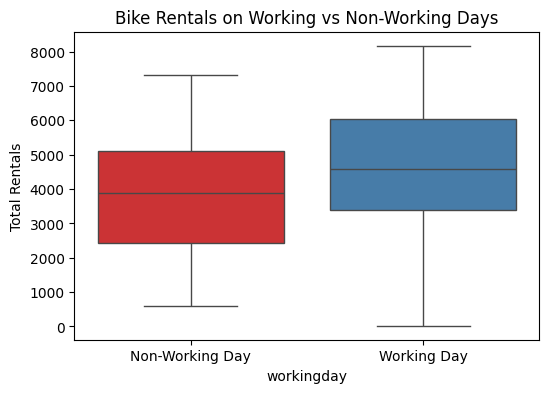

In [127]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="workingday", y="total_rentals", data=df_day, palette="Set1")
plt.xticks([0, 1], ["Non-Working Day", "Working Day"])
plt.title("Bike Rentals on Working vs Non-Working Days")
plt.ylabel("Total Rentals")
plt.show()

 jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur atau akhir pekan. Median jumlah penyewaan pada hari kerja lebih tinggi daripada hari non-kerja, menunjukkan bahwa banyak orang menggunakan sepeda sebagai moda transportasi utama saat bekerja. Rentang interkuartil pada hari kerja juga lebih besar, menandakan adanya variasi yang lebih tinggi dalam jumlah penyewaan. Meskipun demikian, penyewaan sepeda pada hari non-kerja tetap cukup signifikan, kemungkinan besar didorong oleh aktivitas rekreasi. Dengan demikian, perbedaan pola penyewaan ini dapat menjadi pertimbangan dalam pengelolaan ketersediaan sepeda, misalnya dengan meningkatkan jumlah sepeda selama jam sibuk di hari kerja dan tetap mempertahankan jumlah yang memadai untuk kebutuhan rekreasi di akhir pekan.

In [128]:
weather_factors = ["temperature", "humidity", "wind_speed"]
for factor in weather_factors:
    corr_casual, _ = pearsonr(df_day[factor], df_day["casual_users"])
    corr_registered, _ = pearsonr(df_day[factor], df_day["registered_users"])
    print(f"Korelasi {factor} dengan casual_users: {corr_casual:.2f}")
    print(f"Korelasi {factor} dengan registered_users: {corr_registered:.2f}")
    print()

Korelasi temperature dengan casual_users: 0.59
Korelasi temperature dengan registered_users: 0.54

Korelasi humidity dengan casual_users: -0.09
Korelasi humidity dengan registered_users: -0.11

Korelasi wind_speed dengan casual_users: -0.18
Korelasi wind_speed dengan registered_users: -0.21



Temperatur memiliki pengaruh paling besar terhadap jumlah penyewaan sepeda, sementara kelembaban dan kecepatan angin memiliki dampak negatif yang lebih kecil tetapi tetap berpengaruh, terutama bagi pengguna terdaftar.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana efektivitas sistem berbagi sepeda dalam mengurangi penggunaan kendaraan pribadi di kota?

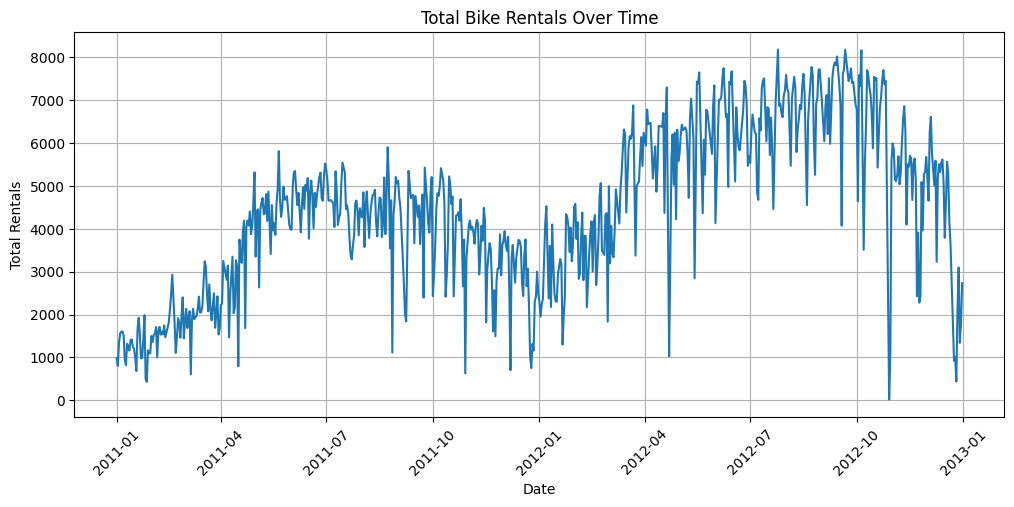

In [129]:
# Tren total penggunaan sepeda dari waktu ke waktu
plt.figure(figsize=(12, 5))
plt.plot(df_day["dateday"], df_day["total_rentals"], label="Total Rentals")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Total Bike Rentals Over Time")
plt.xticks(rotation=45)  # Memutar label tanggal agar lebih mudah dibaca
plt.grid(True)  # Menambahkan grid untuk kejelasan
plt.show()

Berdasarkan grafik jumlah penyewaan sepeda dari waktu ke waktu, terlihat adanya tren peningkatan jumlah penyewaan seiring berjalannya waktu. Pada awal periode, jumlah penyewaan cenderung rendah, tetapi secara bertahap meningkat hingga mencapai puncaknya di pertengahan hingga akhir periode. Pola fluktuatif juga tampak dalam grafik, yang kemungkinan disebabkan oleh faktor musiman, cuaca, atau hari kerja dan libur. Setelah mencapai puncak, jumlah penyewaan mulai mengalami sedikit penurunan di akhir periode, yang bisa disebabkan oleh perubahan musim atau faktor eksternal lainnya.

### Pertanyaan 2: Bagaimana korelasi antara jumlah pengguna kasual dan kondisi cuaca dibandingkan dengan pengguna terdaftar?

<ipython-input-130-9758605a2240>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weather_cond", y="casual_users", data=df_day, estimator=np.mean, palette="Blues")


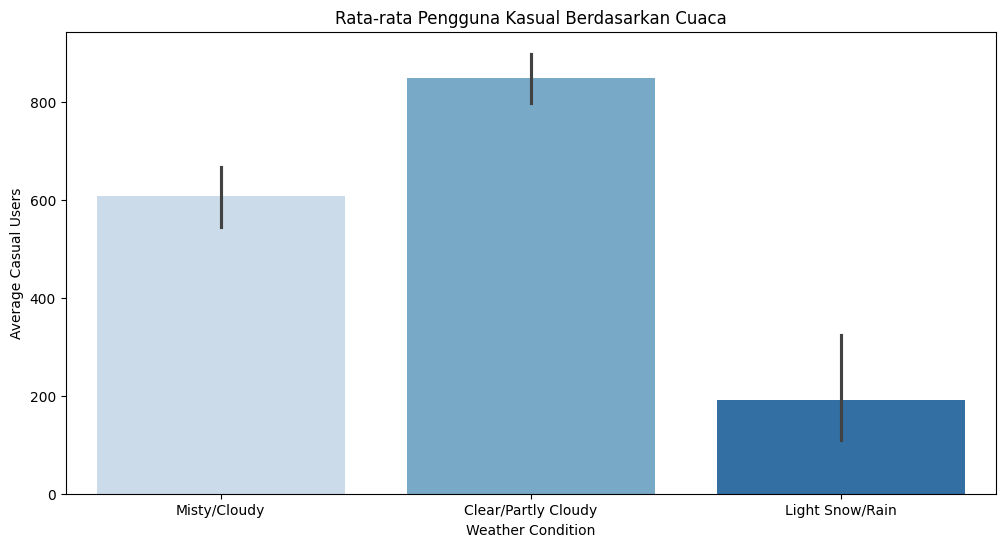

<ipython-input-130-9758605a2240>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weather_cond", y="registered_users", data=df_day, estimator=np.mean, palette="Reds")


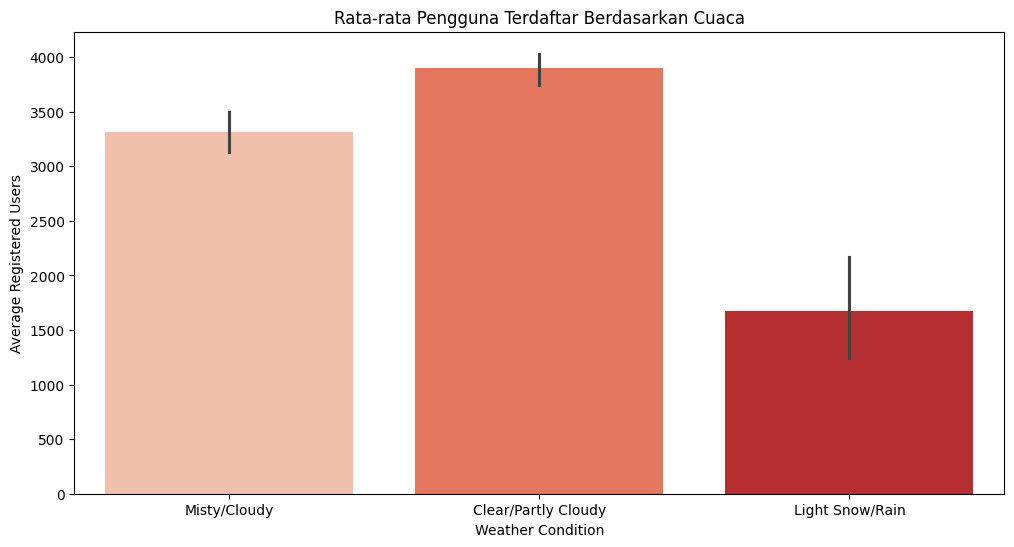

In [130]:
# Visualisasi jumlah pengguna kasual dan terdaftar berdasarkan cuaca dengan diagram batang
plt.figure(figsize=(12, 6))
sns.barplot(x="weather_cond", y="casual_users", data=df_day, estimator=np.mean, palette="Blues")
plt.title("Rata-rata Pengguna Kasual Berdasarkan Cuaca")
plt.xlabel("Weather Condition")
plt.ylabel("Average Casual Users")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="weather_cond", y="registered_users", data=df_day, estimator=np.mean, palette="Reds")
plt.title("Rata-rata Pengguna Terdaftar Berdasarkan Cuaca")
plt.xlabel("Weather Condition")
plt.ylabel("Average Registered Users")
plt.show()


Pada register user banyak orang yang melakukan penyewaan pada cuaca clear/partly cloudy dibandingkan dengan cuaca lainnya. Sedangkan pada kasual user banyak melakukan penyewaan pada cuaca clear/party cloudy weather condition. Kedua user banyak melakukan penyewaan pada cuaca yang sama

In [131]:
df_day.to_csv("all_data.csv", index=False)

In [132]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temperature,feeling_temp,humidity,wind_speed,casual_users,registered_users,total_rentals
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [133]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           676 non-null    int64  
 1   dateday           676 non-null    object 
 2   season            676 non-null    object 
 3   year              676 non-null    int64  
 4   month             676 non-null    object 
 5   holiday           676 non-null    int64  
 6   weekday           676 non-null    object 
 7   workingday        676 non-null    int64  
 8   weather_cond      676 non-null    object 
 9   temperature       676 non-null    float64
 10  feeling_temp      676 non-null    float64
 11  humidity          676 non-null    float64
 12  wind_speed        676 non-null    float64
 13  casual_users      676 non-null    int64  
 14  registered_users  676 non-null    int64  
 15  total_rentals     676 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory us

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

## **Pertanyaan 1: Bagaimana efektivitas sistem berbagi sepeda dalam mengurangi penggunaan kendaraan pribadi di kota?**  

Peningkatan jumlah penyewaan sepeda yang signifikan mengindikasikan bahwa masyarakat mulai beralih ke moda transportasi ini, yang dapat mengurangi ketergantungan pada kendaraan pribadi. Dengan semakin meningkatnya jumlah pengguna, sistem ini dapat berkontribusi dalam mengurangi kemacetan dan emisi gas buang di kota, menjadikannya solusi yang efisien untuk mobilitas perkotaan yang lebih ramah lingkungan.  

---

## **Pertanyaan 2: Bagaimana korelasi antara jumlah pengguna kasual dan kondisi cuaca dibandingkan dengan pengguna terdaftar?**  

### **Pengguna Kasual**  
Pengguna kasual cenderung lebih sensitif terhadap kondisi cuaca. Saat cuaca cerah atau berawan sebagian (*Clear/Partly Cloudy*), jumlah pengguna kasual mencapai puncaknya. Namun, pada kondisi berkabut atau mendung (*Misty/Cloudy*), jumlahnya menurun. Ketika terjadi hujan ringan atau salju (*Light Snow/Rain*), jumlah pengguna kasual turun drastis, menunjukkan bahwa pengguna ini lebih dipengaruhi oleh cuaca buruk.  

### **Pengguna Terdaftar**  
Pengguna terdaftar juga mengalami penurunan jumlah saat cuaca memburuk, tetapi tidak setajam pengguna kasual. Meskipun jumlahnya tetap lebih tinggi pada cuaca cerah, pengguna terdaftar masih menggunakan layanan sepeda dalam jumlah yang signifikan saat cuaca mendung atau hujan ringan. Hal ini menunjukkan bahwa mereka lebih konsisten dalam penggunaan, kemungkinan karena faktor komitmen atau kebutuhan transportasi sehari-hari.  

---

Berikut adalah saran dan rekomendasi untuk meningkatkan penyewaan sepeda berdasarkan masalah yang ada

# **Strategi Meningkatkan Efektivitas Sistem Berbagi Sepeda**

Untuk meningkatkan penggunaan sistem berbagi sepeda dan mengurangi ketergantungan pada kendaraan pribadi, perusahaan dapat melakukan langkah-langkah berikut:

## **1. Peningkatan Infrastruktur & Kenyamanan**
- Menambah jalur sepeda yang aman dan terintegrasi dengan transportasi umum.  
- Menyediakan tempat berteduh di stasiun sepeda dan parkir yang terlindungi.  
- Menggunakan sepeda berkualitas dengan ban anti-selip dan fender pelindung.  

## **2. Strategi Harga & Insentif**
- Memberikan diskon atau perjalanan gratis saat cuaca buruk.  
- Menawarkan paket berlangganan fleksibel bagi pengguna kasual.  
- Menyediakan insentif bagi pengguna reguler dan pekerja.  

## **3. Edukasi & Keselamatan**
- Mengadakan kampanye keselamatan berkendara dalam berbagai cuaca.  
- Menyediakan perlengkapan seperti jas hujan ringan dan helm khusus.  
- Meningkatkan kesadaran manfaat sepeda bagi kesehatan dan lingkungan.  


